# Exploratory Data Analysis - Enrolment

In [210]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cm as cm
from matplotlib.patches import Patch
import matplotlib.ticker as ticker
import seaborn as sns

import time

import math
import scipy.stats as stats

In [212]:
enrollment = pd.read_csv('Cleaned Datasets/cleaned_enrollment.csv')
# biometric = pd.read_csv('Cleaned Datasets/cleaned_biometric.csv')
# demography = pd.read_csv('Cleaned Datasets/cleaned_demographic.csv')

os.makedirs('Enrolment Images', exist_ok=True)

print("Successfully loaded the Cleaned Datasets")

Successfully loaded the Cleaned Datasets


## 1. Analysing Enrollment Data

In [215]:
enrollment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006007 entries, 0 to 1006006
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   date             1006007 non-null  object
 1   state            1006007 non-null  object
 2   district         1006007 non-null  object
 3   pincode          1006007 non-null  int64 
 4   age_0_5          1006007 non-null  int64 
 5   age_5_17         1006007 non-null  int64 
 6   age_18_greater   1006007 non-null  int64 
 7   total_enrolment  1006007 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 61.4+ MB


In [217]:
enrollment['date'] = pd.to_datetime(enrollment['date'])
enrollment['pincode'] = enrollment['pincode'].astype(str)

enrollment.to_csv("Cleaned Datasets/cleaned_enrollment.csv", index=False)

In [218]:
enrollment.describe(include='all')

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,total_enrolment
count,1006007,1006007,1006007,1006007,1.006007e+06,1.006007e+06,1.006007e+06,1.006007e+06
unique,NaN,36,795,19462,NaN,NaN,NaN,NaN
top,NaN,Uttar Pradesh,Bengaluru Urban,500055,NaN,NaN,NaN,NaN
freq,NaN,110369,9031,274,NaN,NaN,NaN,NaN
mean,2025-10-23 18:26:17.154035712,NaN,NaN,NaN,3.525786e+00,1.710110e+00,1.671320e-01,5.403028e+00
min,2025-03-02 00:00:00,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,2025-09-19 00:00:00,NaN,NaN,NaN,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,2025-10-27 00:00:00,NaN,NaN,NaN,2.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
75%,2025-11-15 00:00:00,NaN,NaN,NaN,3.000000e+00,1.000000e+00,0.000000e+00,5.000000e+00
max,2025-12-31 00:00:00,NaN,NaN,NaN,2.688000e+03,1.812000e+03,8.550000e+02,3.965000e+03


In [149]:
enrollment.head(10)

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,Total_Enrolment,total_enrolment
0,2025-03-02,Meghalaya,East Khasi Hills,793121,11,61,37,109,109
1,2025-03-09,Karnataka,Bengaluru Urban,560043,14,33,39,86,86
2,2025-03-09,Uttar Pradesh,Kanpur Nagar,208001,29,82,12,123,123
3,2025-03-09,Uttar Pradesh,Aligarh,202133,62,29,15,106,106
4,2025-03-09,Karnataka,Bengaluru Urban,560016,14,16,21,51,51
5,2025-03-09,Bihar,Sitamarhi,843331,20,49,12,81,81
6,2025-03-09,Bihar,Sitamarhi,843330,23,24,42,89,89
7,2025-03-09,Uttar Pradesh,Bahraich,271865,26,60,14,100,100
8,2025-03-09,Uttar Pradesh,Firozabad,283204,28,26,10,64,64
9,2025-03-09,Bihar,East Champaran,845418,30,48,10,88,88


In [150]:
def validate_sample_significance(df, target_col, n, confidence=0.95):
    N = len(df)
    sigma = df[target_col].std()
    mu = df[target_col].mean()
    z_score = stats.norm.ppf((1 + confidence) / 2)
    standard_error = (sigma / math.sqrt(n)) * math.sqrt((N - n) / (N - 1))
    moe_absolute = z_score * standard_error
    moe_relative = (moe_absolute / mu) * 100
    
    print(f"VALIDATION REPORT for '{target_col}'")
    print(f"Sample Size: {n:,} | Relative Error: {moe_relative:.2f}%")
    if moe_relative < 10:
        print("STATUS: ACCEPTABLE for EDA")
    else:
        print("STATUS: HIGH VARIANCE DETECTED")
    print("-" * 40)

In [151]:
# Validate 20k sample on 'Total_Enrolment'
validate_sample_significance(enrollment, 'Total_Enrolment', n=20000)

VALIDATION REPORT for 'Total_Enrolment'
Sample Size: 20,000 | Relative Error: 8.02%
STATUS: ACCEPTABLE for EDA
----------------------------------------


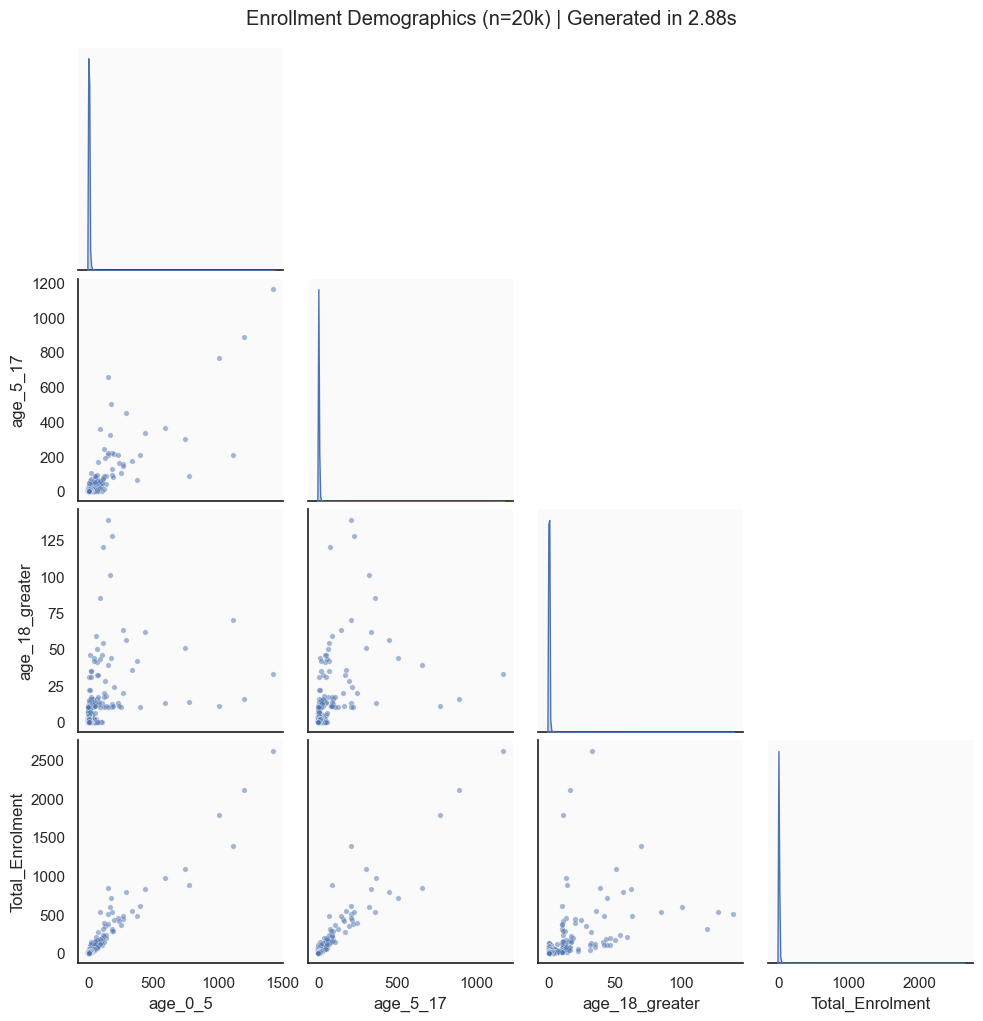

In [152]:
# Generate the Plot
start_time = time.time()
enrollment_sample = enrollment.sample(n=20000, random_state=42)

sns.pairplot(
    enrollment_sample,
    vars=['age_0_5', 'age_5_17', 'age_18_greater', 'Total_Enrolment'],
    diag_kind='kde',
    corner=True,
    plot_kws={'alpha': 0.5, 's': 15}
)

plt.suptitle(f'Enrollment Demographics (n=20k) | Generated in {time.time() - start_time:.2f}s', y=1.02)
plt.show()

In [153]:
# Check if the sum of parts equals the total
sum_check = (enrollment['age_0_5'] + enrollment['age_5_17'] + enrollment['age_18_greater']) == enrollment['Total_Enrolment']
mismatches = len(enrollment) - sum_check.sum() 

print(f"Number of rows with inconsistent totals: {mismatches}")

Number of rows with inconsistent totals: 0


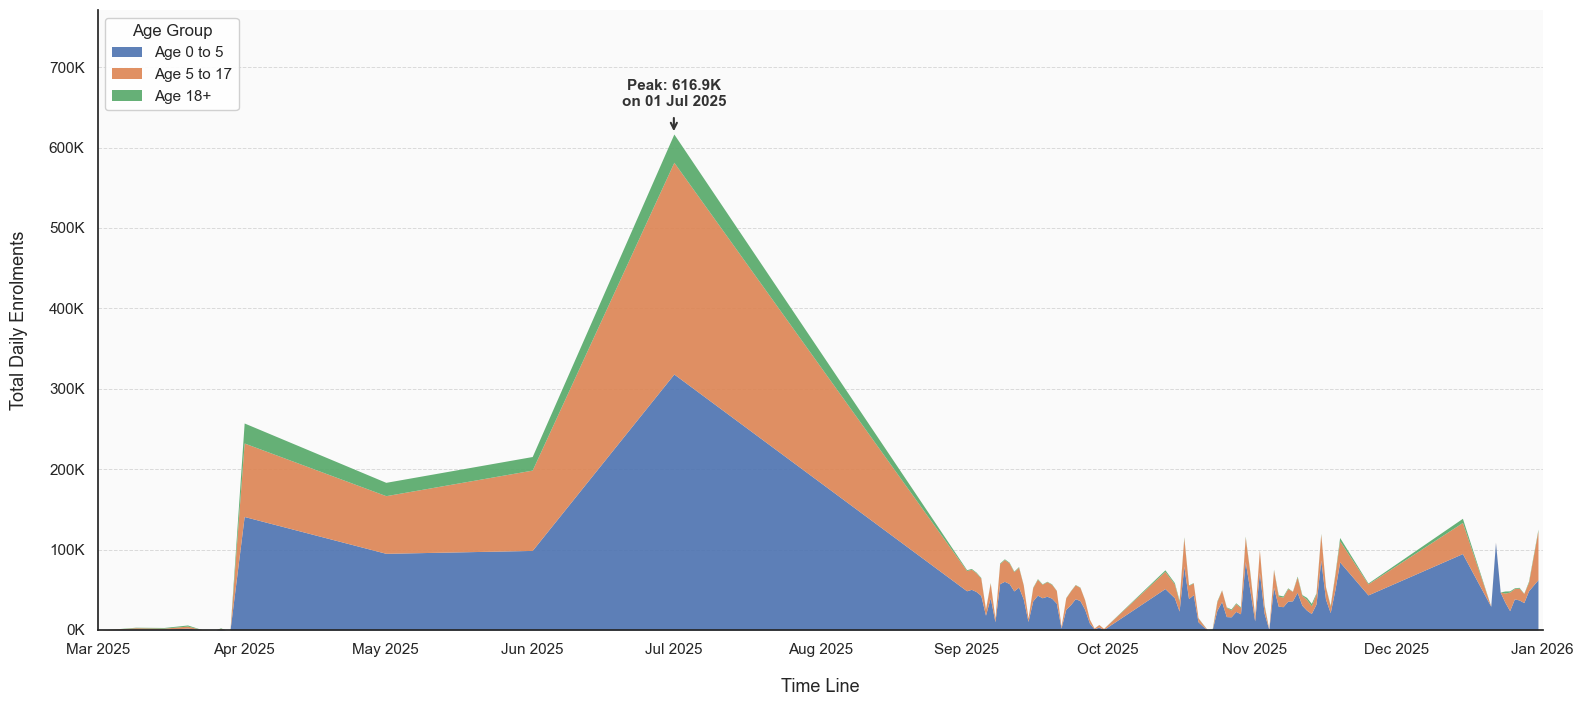

In [154]:
# Set style
sns.set_theme(style="white", rc={"axes.facecolor": "#fafafa"})

# --- Data Processing ---
enrollment['date'] = pd.to_datetime(enrollment['date'])
daily_trend = enrollment.groupby('date')[['age_0_5', 'age_5_17', 'age_18_greater']].sum()

# Rename columns for the Legend
daily_trend.columns = ['Age 0 to 5', 'Age 5 to 17', 'Age 18+']

# --- Plotting ---
fig, ax = plt.subplots(figsize=(16, 8))
colors = sns.color_palette("deep", 3)

# Plot
daily_trend.plot(kind='area', stacked=True, alpha=0.9, ax=ax, color=colors, linewidth=0)

# --- FIX: Perfect Title Alignment ---
# We use fig.text() for BOTH, relative to the figure (0=left edge, 1=right edge)
# x=0.125 aligns with the start of the y-axis (roughly)
# fig.text(x=0.125, y=0.98, s='Daily Enrolment Volume by Age Group', 
#         fontsize=22, fontweight='bold', ha='left', va='top', fontfamily='sans-serif')

# fig.text(x=0.125, y=0.93, s='Cumulative daily enrolment breakdown across age categories (Mar \'25 - Jan \'26)', 
#         fontsize=14, color='#555555', ha='left', va='top', fontfamily='sans-serif')

# --- Legend & Limits ---
ax.legend(title='Age Group', title_fontsize='12', fontsize='11',
          loc='upper left', frameon=True, framealpha=0.9, facecolor='white')

# Set Headroom (125% of peak)
total_daily = daily_trend.sum(axis=1)
peak_value = total_daily.max()
peak_date = total_daily.idxmax()
ax.set_ylim(0, peak_value * 1.25)

# Limits
ax.margins(x=0)
ax.set_xlim(pd.Timestamp('2025-03-01'), pd.Timestamp('2026-01-01'))

# --- Formatting ---
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=0, ha='center', fontsize=11)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1000:.0f}K'))
plt.yticks(fontsize=11)

ax.set_ylabel('Total Daily Enrolments', fontsize=13, labelpad=15)
ax.set_xlabel('Time Line', fontsize=13, labelpad=15)

# Aesthetics
sns.despine()
ax.grid(True, which='major', axis='y', linestyle='--', linewidth=0.7, color='#cccccc', alpha=0.7)
ax.grid(False, axis='x')

# --- Annotation ---
peak_date_str = peak_date.strftime('%d %b %Y')
ax.annotate(f'Peak: {peak_value/1000:.1f}K\non {peak_date_str}',
            xy=(peak_date, peak_value),
            xytext=(peak_date, peak_value + (peak_value * 0.05)),
            arrowprops=dict(arrowstyle='->', color='#333333', lw=1.5),
            fontsize=11, color='#333333', ha='center', va='bottom', 
            fontweight='bold', backgroundcolor='#fafafa')

plt.tight_layout()

# Adjust top margin to make room for the new fig.text titles
plt.subplots_adjust(top=0.88)

plt.savefig('Enrolment Images/Total_enrolment_timeseries.png', dpi=300, bbox_inches='tight')
plt.show()

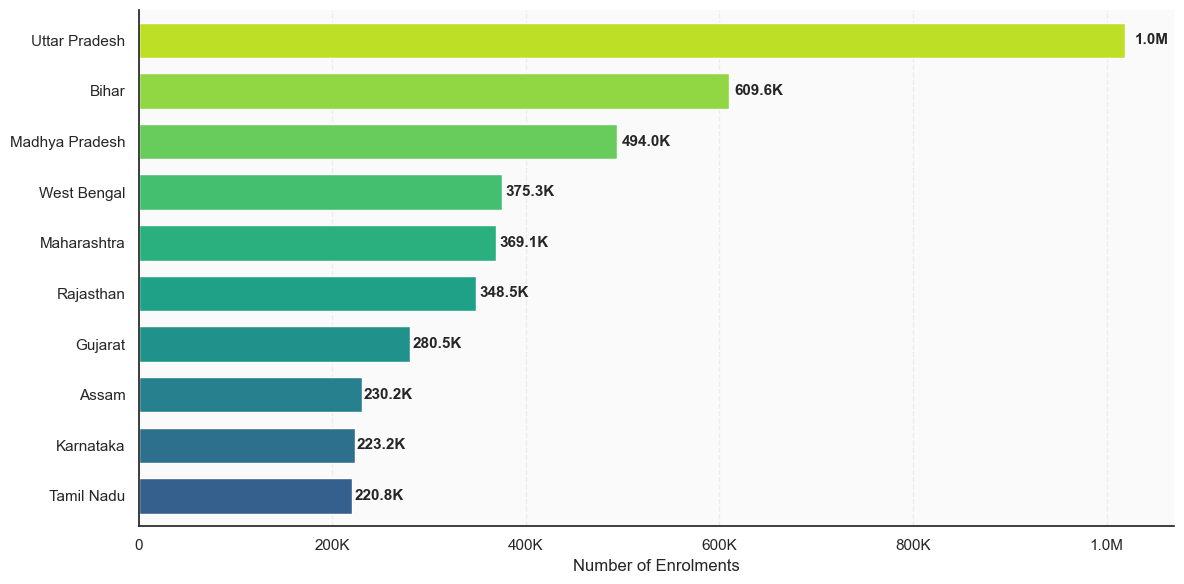

In [155]:
# --- Data Preparation ---
# (Assuming 'enrollment' df is already loaded and filtered)
top_districts = enrollment.groupby('state')['Total_Enrolment'].sum().nlargest(10).sort_values()

# --- Plotting ---
plt.figure(figsize=(12, 6))

# Generate gradient colors
colors = cm.viridis(np.linspace(0.3, 0.9, len(top_districts)))

# Plot
ax = top_districts.plot(kind='barh', color=colors, width=0.7)

plt.xlabel('Number of Enrolments', fontsize=12)
plt.ylabel('') 
plt.grid(axis='x', linestyle='--', alpha=0.3)

# --- NEW: Format X-Axis Ticks (The "Row" Numbers) ---
def human_format_axis(x, pos):
    if x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x/1_000:.0f}K'
    else:
        return str(int(x))

ax.xaxis.set_major_formatter(ticker.FuncFormatter(human_format_axis))
# ----------------------------------------------------

# Add value labels inside bars (Your existing logic)
for index, value in enumerate(top_districts):
    if value >= 1_000_000:
        label = f'{value/1_000_000:.1f}M'
    elif value >= 1_000:
        label = f'{value/1_000:.1f}K'
    else:
        label = str(int(value))
    
    plt.text(value * 1.01, index, label, va='center', fontsize=11, fontweight='bold')

# Clean up borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('Enrolment Images/Enrolment_wise_top_states.png', dpi=300, bbox_inches='tight')
plt.show()

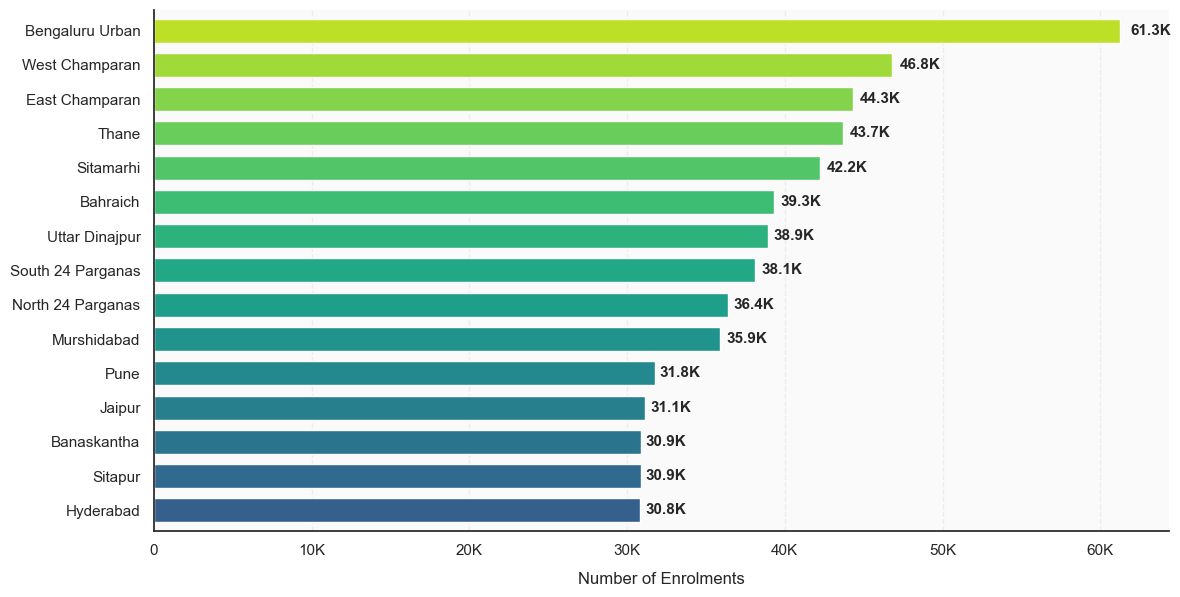

In [156]:
# --- Data Preparation ---
# (Assuming 'enrollment' df is already loaded and filtered)
top_districts = enrollment.groupby('district')['Total_Enrolment'].sum().nlargest(15).sort_values()

# --- Plotting ---
# Switch to subplots for better control over layout
fig, ax = plt.subplots(figsize=(12, 7))

# Generate gradient colors
colors = cm.viridis(np.linspace(0.3, 0.9, len(top_districts)))

# Plot
top_districts.plot(kind='barh', color=colors, width=0.7, ax=ax)

# --- Formatting ---
plt.xlabel('Number of Enrolments', fontsize=12, labelpad=10)
plt.ylabel('') 
plt.grid(axis='x', linestyle='--', alpha=0.3)

# --- Format X-Axis Ticks (M/K) ---
def human_format_axis(x, pos):
    if x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x/1_000:.0f}K'
    else:
        return str(int(x))

ax.xaxis.set_major_formatter(ticker.FuncFormatter(human_format_axis))

# --- Add Value Labels ---
for index, value in enumerate(top_districts):
    if value >= 1_000_000:
        label = f'{value/1_000_000:.1f}M'
    elif value >= 1_000:
        label = f'{value/1_000:.1f}K'
    else:
        label = str(int(value))
    
    # Dynamic padding (value * 1.01)
    plt.text(value * 1.01, index, label, va='center', fontsize=11, fontweight='bold')

# --- Aesthetics ---
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust layout to make room for the custom titles at the top
plt.tight_layout()
plt.subplots_adjust(top=0.85)

plt.savefig('Enrolment Images/Enrolment_wise_top_districts.png', dpi=300, bbox_inches='tight')
plt.show()

In [157]:
print(enrollment['date'].dtype)

datetime64[ns]


In [158]:
print(f"{round(enrollment['Total_Enrolment'].sum()/10**6, 2)}M")

5.44M


C:\Users\priya\AppData\Local\Temp\ipykernel_35448\3518550898.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=daily_sums.index, y=daily_sums.values, palette=colors)


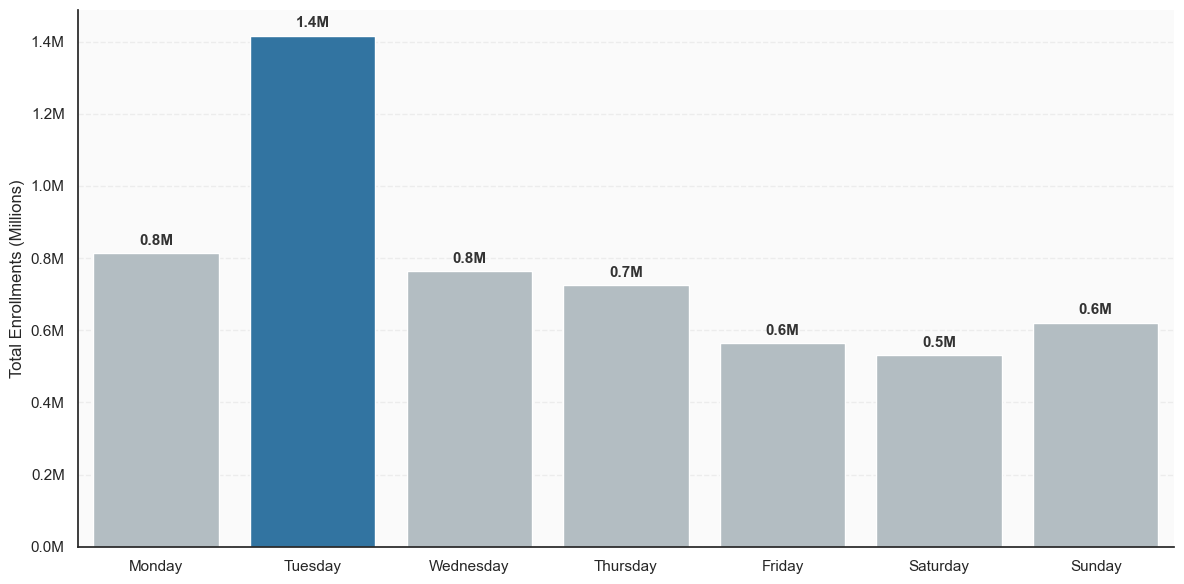

In [159]:
# Ensure 'date' is in datetime format first
enrollment['date'] = pd.to_datetime(enrollment['date']) 
# Create the 'Day_Name' column
enrollment['Day_Name'] = enrollment['date'].dt.day_name()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sums = enrollment.groupby('Day_Name')['Total_Enrolment'].sum().reindex(day_order)

plt.figure(figsize=(12, 6))

# We create a list of colors: Grey for normal days, Teal/Blue for the max day
max_value = daily_sums.max()
colors = ['#B0BEC5' if x < max_value else '#1f77b4' for x in daily_sums]

# 3. Plot
ax = sns.barplot(x=daily_sums.index, y=daily_sums.values, palette=colors)


# Loop through the bars and add the text value on top
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/1e6:.1f}M', 
                (p.get_x() + p.get_width() / 2., height), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                fontsize=11, fontweight='bold', color='#333333')

# 5. Styling & Formatting
# plt.title('Total Enrollments by Day of Week', fontsize=16, pad=20)
plt.ylabel('Total Enrollments (Millions)', fontsize=12)
plt.xlabel('') # Day names are self-explanatory

# Format Y-axis to show "M" instead of scientific notation
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M'))

# Remove top and right borders
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

C:\Users\priya\AppData\Local\Temp\ipykernel_35448\1169227767.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


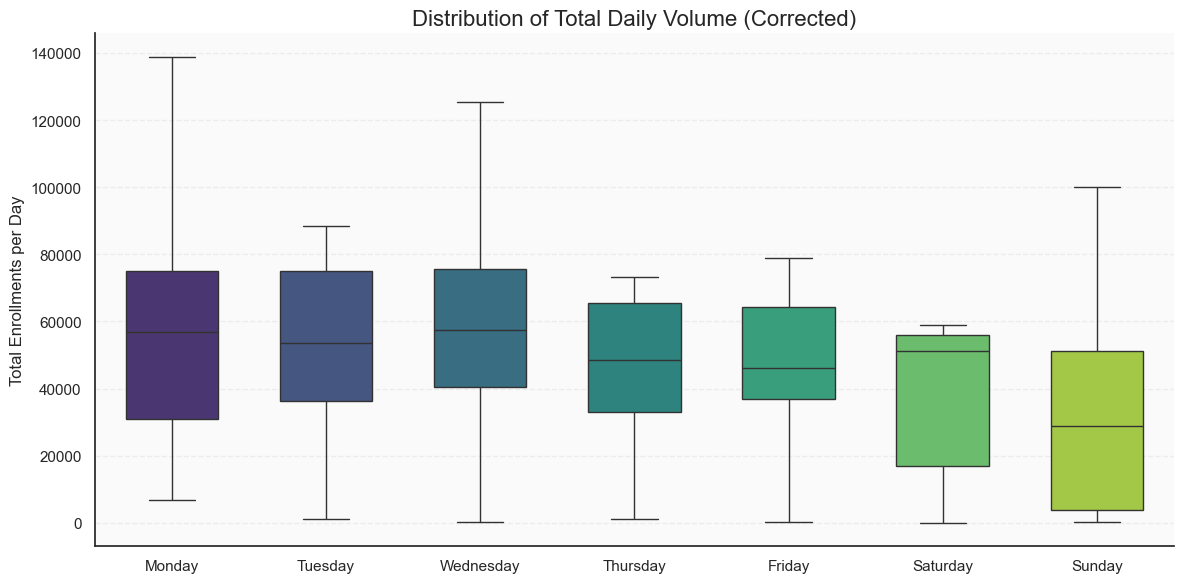

In [160]:
# 1. AGGREGATE FIRST: Sum up everything for each specific Date
# This combines all districts/ages into one single number for that day
daily_totals = enrollment.groupby(['date', 'Day_Name'])['Total_Enrolment'].sum().reset_index()

# 2. PLOT THE AGGREGATED DATA
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(12, 6))

sns.boxplot(
    data=daily_totals,   # Use the new aggregated dataframe
    x='Day_Name', 
    y='Total_Enrolment', 
    order=day_order, 
    palette='viridis', 
    showfliers=False,    # Keep this False to see the main trend clearly
    width=0.6
)

plt.title('Distribution of Total Daily Volume (Corrected)', fontsize=16)
plt.ylabel('Total Enrollments per Day', fontsize=12)
plt.xlabel('')
plt.grid(axis='y', linestyle='--', alpha=0.3)
sns.despine()

plt.tight_layout()
plt.show()

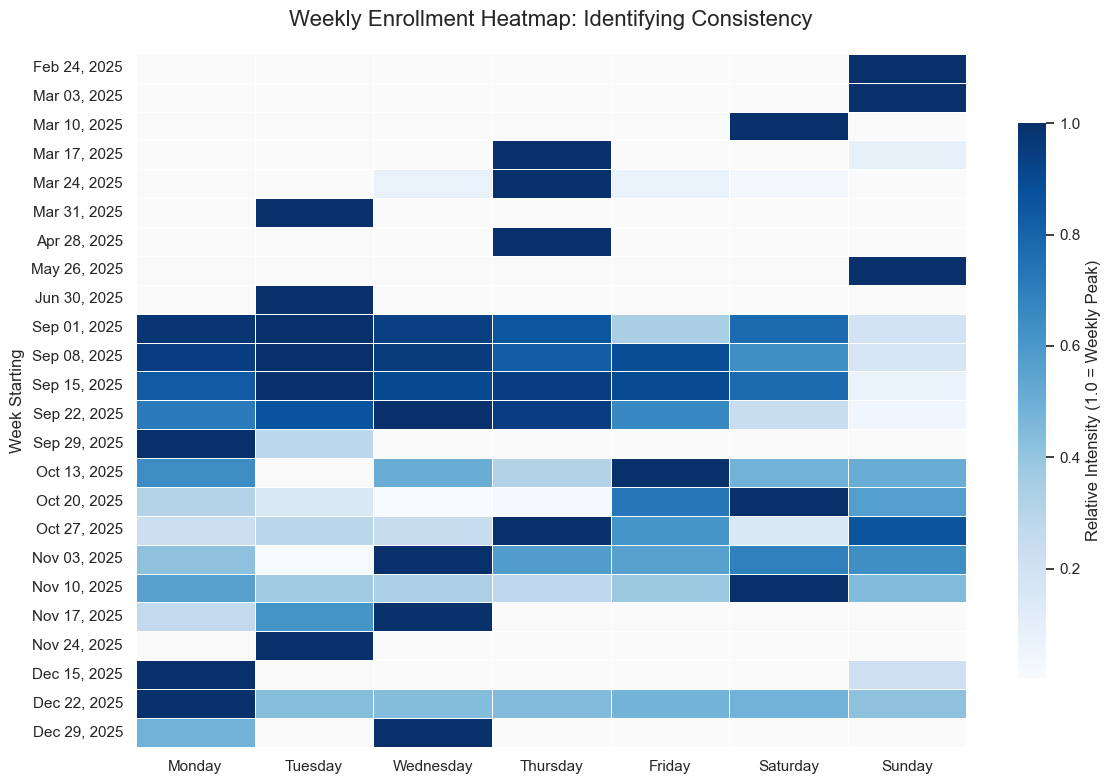

In [161]:
# 1. Pivot Data
enrollment['Week_Start'] = enrollment['date'].dt.to_period('W').apply(lambda r: r.start_time)
weekly_pivot = enrollment.pivot_table(index='Week_Start', columns='Day_Name', values='Total_Enrolment', aggfunc='sum')
weekly_pivot = weekly_pivot.reindex(columns=day_order)

# 2. Normalize (Row-wise) to highlight the peak day of each week
# 1.0 = Darkest Blue (Highest day of that specific week)
weekly_normalized = weekly_pivot.div(weekly_pivot.max(axis=1), axis=0)

# 3. Format Index for cleaner Y-axis labels
# Convert index to string "Month Day, Year" format
yticklabels = [date.strftime('%b %d, %Y') for date in weekly_normalized.index]

plt.figure(figsize=(12, 8))

sns.heatmap(
    weekly_normalized, 
    cmap='Blues', 
    linewidths=0.5, 
    linecolor='white',
    yticklabels=yticklabels,
    cbar_kws={'label': 'Relative Intensity (1.0 = Weekly Peak)', 'shrink': 0.8}
)

plt.title('Weekly Enrollment Heatmap: Identifying Consistency', fontsize=16, pad=20)
plt.ylabel('Week Starting', fontsize=12)
plt.xlabel('')
plt.xticks(rotation=0) # Keep day names horizontal
plt.yticks(rotation=0) # Keep dates horizontal

plt.tight_layout()
plt.show()

C:\Users\priya\AppData\Local\Temp\ipykernel_35448\3126962474.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_sums.index, y=daily_sums.values, palette=colors, width=0.8, ax=ax)
C:\Users\priya\AppData\Local\Temp\ipykernel_35448\3126962474.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  days = day_counts[i]


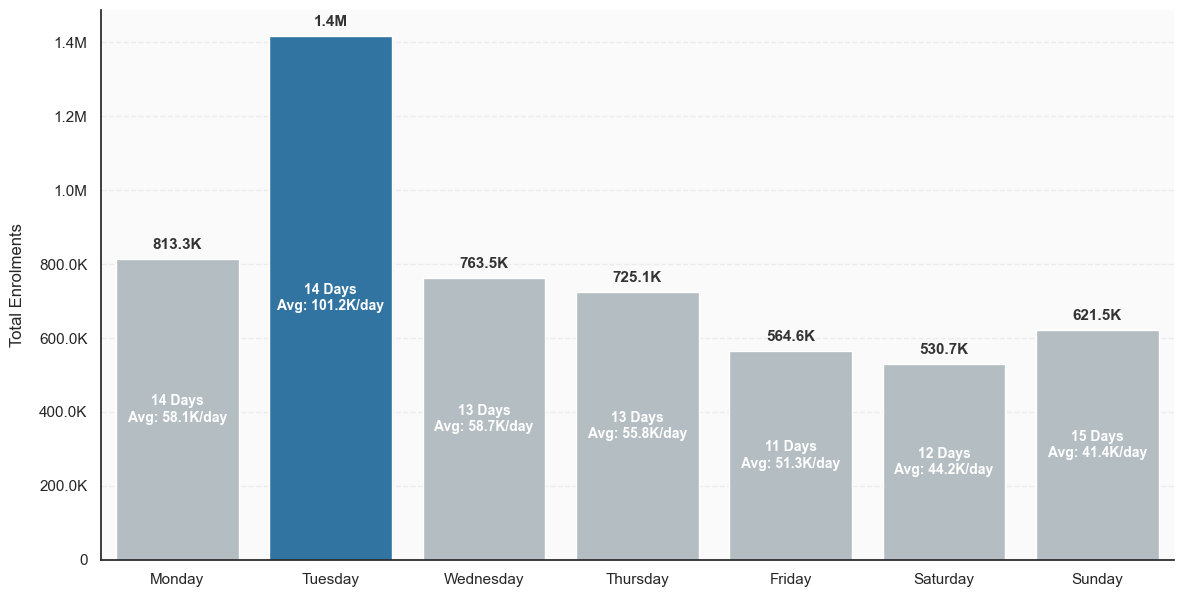

In [162]:
# --- 1. Data Preparation ---
# Ensure Day_Name column exists
enrollment['Day_Name'] = pd.to_datetime(enrollment['date']).dt.day_name()

# Aggregation
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sums = enrollment.groupby('Day_Name')['Total_Enrolment'].sum().reindex(day_order)
day_counts = enrollment.groupby('Day_Name')['date'].nunique().reindex(day_order)

# --- 2. Helper Function for M/K Formatting ---
def human_format(num, pos=None):
    if num >= 1_000_000:
        return f'{num/1_000_000:.1f}M'
    elif num >= 1_000:
        return f'{num/1_000:.1f}K'
    else:
        return str(int(num))

# --- 3. Plotting ---
fig, ax = plt.subplots(figsize=(12, 7))

# Identify max value for color highlighting
max_value = daily_sums.max()
colors = ['#1f77b4' if x == max_value else '#B0BEC5' for x in daily_sums]

# Plot Bar Chart
sns.barplot(x=daily_sums.index, y=daily_sums.values, palette=colors, width=0.8, ax=ax)


# --- 5. Adding Dynamic Labels (M/K) ---
for i, p in enumerate(ax.patches):
    height = p.get_height()
    days = day_counts[i]
    avg = height / days if days > 0 else 0
    
    # A. Top Label: Total Volume (Dynamic M/K)
    vol_label = human_format(height)
    ax.annotate(vol_label, 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', xytext=(0, 5), 
                textcoords='offset points', fontsize=11, fontweight='bold', color='#333333')
    
    # B. Middle Label: Efficiency Stats
    # We format the average using the same logic (likely K)
    avg_label = human_format(avg)
    
    # Only show text inside if bar is tall enough (optional check)
    if height > 0:
        info_text = f'{days} Days\nAvg: {avg_label}/day'
        ax.text(p.get_x() + p.get_width() / 2., height / 2, 
                info_text, ha='center', va='center', 
                color='white', fontsize=10, fontweight='bold')

# --- 6. Formatting & Styling ---
plt.ylabel('Total Enrolments', fontsize=12, labelpad=10)
plt.xlabel('')

# Apply Dynamic Formatter to Y-Axis
ax.yaxis.set_major_formatter(ticker.FuncFormatter(human_format))

sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Adjust layout for titles
plt.tight_layout()
plt.subplots_adjust(top=0.85)

plt.savefig('Enrolment Images/Day_wise_enrolment.png', dpi=300, bbox_inches='tight')
plt.show()

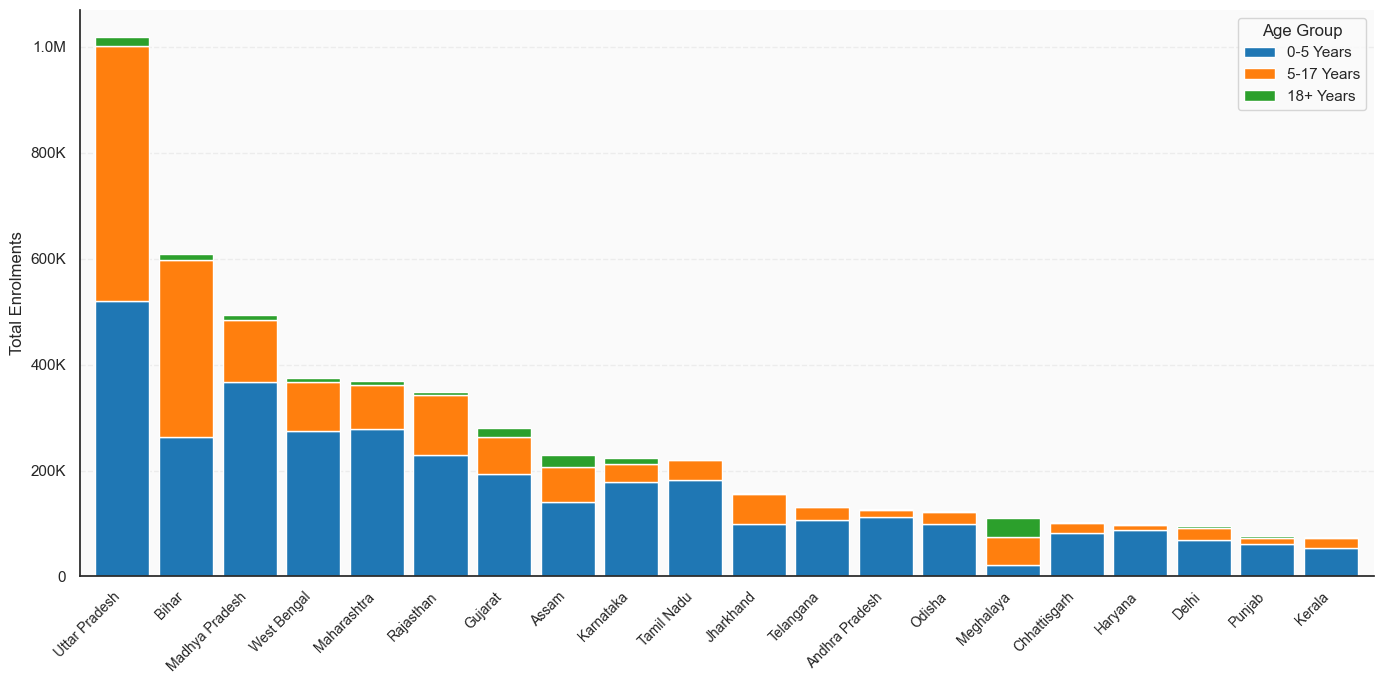

In [163]:
# --- 1. Data Preparation ---
age_cols = ['age_0_5', 'age_5_17', 'age_18_greater']

# Group by State and sum the age columns
state_group = enrollment.groupby('state')[age_cols].sum()

# Calculate a 'Total' column for sorting purposes
state_group['Total'] = state_group.sum(axis=1)

# Sort descending by Total so the largest states are on the left
state_group = state_group.sort_values('Total', ascending=False)

# --- MODIFICATION: Slice to keep only Top 18 States (Top 50%) ---
state_group = state_group.head(20)
# ---------------------------------------------------------------

# Drop the 'Total' column so it doesn't get plotted as a stack segment
state_group = state_group.drop(columns='Total')

# Rename columns for cleaner legend labels
state_group.columns = ['0-5 Years', '5-17 Years', '18+ Years']

# --- 2. Plotting ---
plt.figure(figsize=(14, 7))

# Create the Stacked Bar Chart
# width=0.85 makes bars wide but distinct
ax = state_group.plot(kind='bar', stacked=True, width=0.85, 
                      color=['#1f77b4', '#ff7f0e', '#2ca02c'], ax=plt.gca())

# --- 3. Styling & Labels ---
plt.ylabel('Total Enrolments', fontsize=12)
plt.xlabel('', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Format Y-axis to Millions/Thousands
def human_format(num, pos):
    if num >= 1e6: return f'{num/1e6:.1f}M'
    if num >= 1e3: return f'{num/1e3:.0f}K'
    return f'{num:.0f}'
ax.yaxis.set_major_formatter(ticker.FuncFormatter(human_format))

# Add Legend
plt.legend(title='Age Group', frameon=True, loc='upper right')

# Styling
plt.grid(axis='y', linestyle='--', alpha=0.3)
sns.despine()

plt.tight_layout()

plt.show()

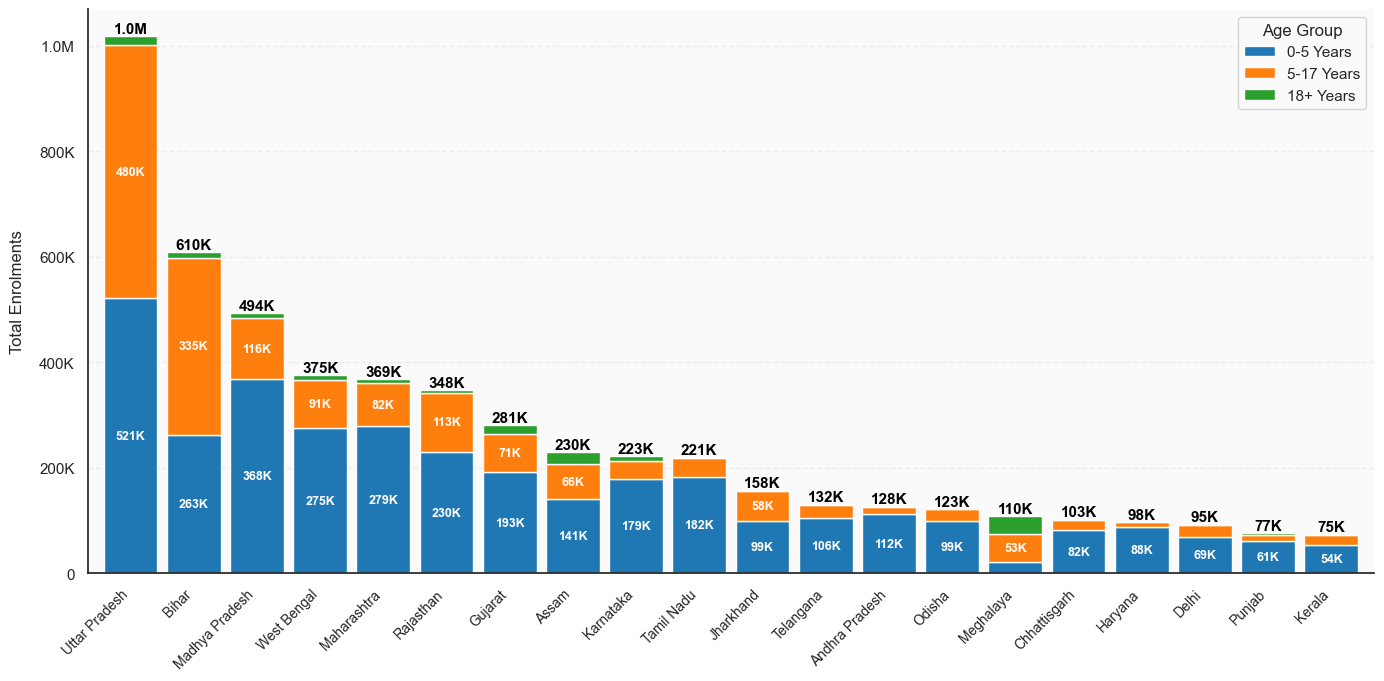

In [164]:
# --- 1. Data Preparation ---
age_cols = ['age_0_5', 'age_5_17', 'age_18_greater']

# Group by State and sum
state_group = enrollment.groupby('state')[age_cols].sum()

# Calculate Total for sorting
state_group['Total'] = state_group.sum(axis=1)

# Sort descending
state_group = state_group.sort_values('Total', ascending=False)

# Keep Top 20
state_group = state_group.head(20)

# Extract Totals for the Top Label logic later
totals = state_group['Total'].values 

# Drop Total for plotting
plot_data = state_group.drop(columns='Total')
plot_data.columns = ['0-5 Years', '5-17 Years', '18+ Years']

# --- 2. Helper Formatter ---
def human_format(num, pos=None):
    if num >= 1e6: return f'{num/1e6:.1f}M'
    if num >= 1e3: return f'{num/1e3:.0f}K'
    return f'{num:.0f}'

# --- 3. Plotting ---
fig, ax = plt.subplots(figsize=(14, 8))

# Create Stacked Bar Chart
plot_data.plot(kind='bar', stacked=True, width=0.85, 
               color=['#1f77b4', '#ff7f0e', '#2ca02c'], ax=ax)

# --- 4. Titles (Restored & Aligned) ---
#fig.text(x=0.05, y=0.96, s='State-wise Enrollment by Age Group', 
#         fontsize=20, fontweight='bold', ha='left', va='top', fontfamily='sans-serif')
#fig.text(x=0.05, y=0.91, s='Breakdown of demographics (Top 20 States)', 
#         fontsize=13, color='#555555', ha='left', va='top', fontfamily='sans-serif')

# --- 5. Logic for LABELS ---

# A. Inside Labels (Segments) - TOP 20
for container in ax.containers:
    for i, bar in enumerate(container):
        
        # Apply to all bars since we filtered dataframe to Top 20 already
        if i < 20: 
            height = bar.get_height()
            width = bar.get_width()
            x = bar.get_x()
            y = bar.get_y()
            
            # --- MODIFICATION: INCREASED THRESHOLD ---
            # Changed 0.02 (2%) to 0.05 (5%)
            # This ensures the segment is ~2.5x taller than before, preventing overlap
            if height > (totals.max() * 0.05): 
                label_text = human_format(height)
                ax.text(x + width/2, y + height/2, label_text, 
                        ha='center', va='center', color='white', 
                        fontsize=9, fontweight='bold')

# B. Top Labels (Totals) - TOP 20
for i in range(20):
    total_val = totals[i]
    label_text = human_format(total_val)
    
    # Place text slightly above the bar
    ax.text(i, total_val, label_text, 
            ha='center', va='bottom', fontsize=11, fontweight='bold', color='black')

# --- 6. Styling ---
plt.ylabel('Total Enrolments', fontsize=12, labelpad=10)
plt.xlabel('', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Apply Formatter to Y-Axis
ax.yaxis.set_major_formatter(ticker.FuncFormatter(human_format))

# Legend
plt.legend(title='Age Group', frameon=True, loc='upper right')

# Grid & Spines
plt.grid(axis='y', linestyle='--', alpha=0.3)
sns.despine()

# Adjust layout for titles
plt.tight_layout()
plt.subplots_adjust(top=0.85)

plt.savefig('Enrolment Images/State&Age_wise_enrolment_labeled.png', dpi=300, bbox_inches='tight')
plt.show()

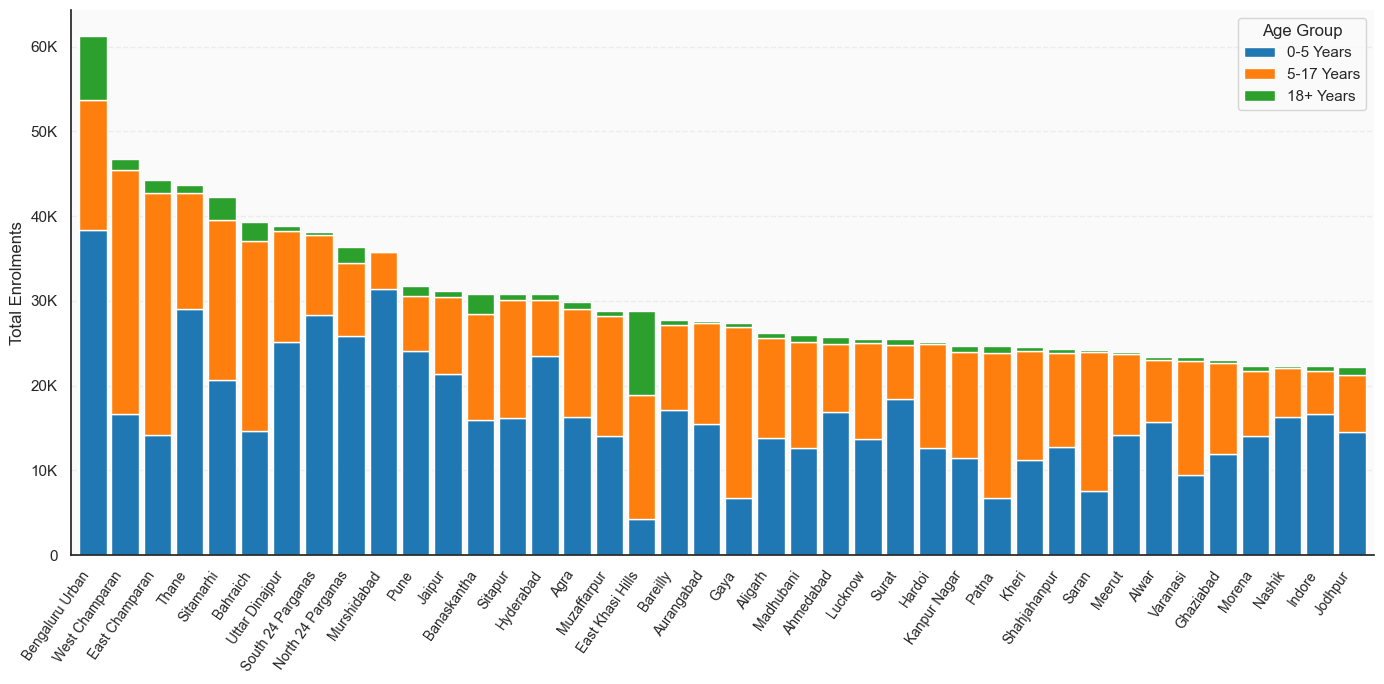

In [165]:
# --- 1. Data Preparation ---
age_cols = ['age_0_5', 'age_5_17', 'age_18_greater']

# Group by State and sum the age columns
districts_group = enrollment.groupby('district')[age_cols].sum()

# Calculate a 'Total' column for sorting purposes
districts_group['Total'] = districts_group.sum(axis=1)

# Sort descending by Total so the largest states are on the left
districts_group = districts_group.sort_values('Total', ascending=False)

# --- MODIFICATION: Slice to keep only Top 18 States (Top 50%) ---
districts_group = districts_group.head(40)
# ---------------------------------------------------------------

# Drop the 'Total' column so it doesn't get plotted as a stack segment
districts_group = districts_group.drop(columns='Total')

# Rename columns for cleaner legend labels
districts_group.columns = ['0-5 Years', '5-17 Years', '18+ Years']

# --- 2. Plotting ---
plt.figure(figsize=(14, 7))

# Create the Stacked Bar Chart
# width=0.85 makes bars wide but distinct
ax = districts_group.plot(kind='bar', stacked=True, width=0.85, 
                      color=['#1f77b4', '#ff7f0e', '#2ca02c'], ax=plt.gca())

# --- 3. Styling & Labels ---
plt.ylabel('Total Enrolments', fontsize=12)
plt.xlabel('', fontsize=12)
plt.xticks(rotation=55, ha='right', fontsize=10)

# Format Y-axis to Millions/Thousands
def human_format(num, pos):
    if num >= 1e6: return f'{num/1e6:.1f}M'
    if num >= 1e3: return f'{num/1e3:.0f}K'
    return f'{num:.0f}'
ax.yaxis.set_major_formatter(ticker.FuncFormatter(human_format))

# Add Legend
plt.legend(title='Age Group', frameon=True, loc='upper right')

# Styling
plt.grid(axis='y', linestyle='--', alpha=0.3)
sns.despine()

plt.tight_layout()

plt.show()

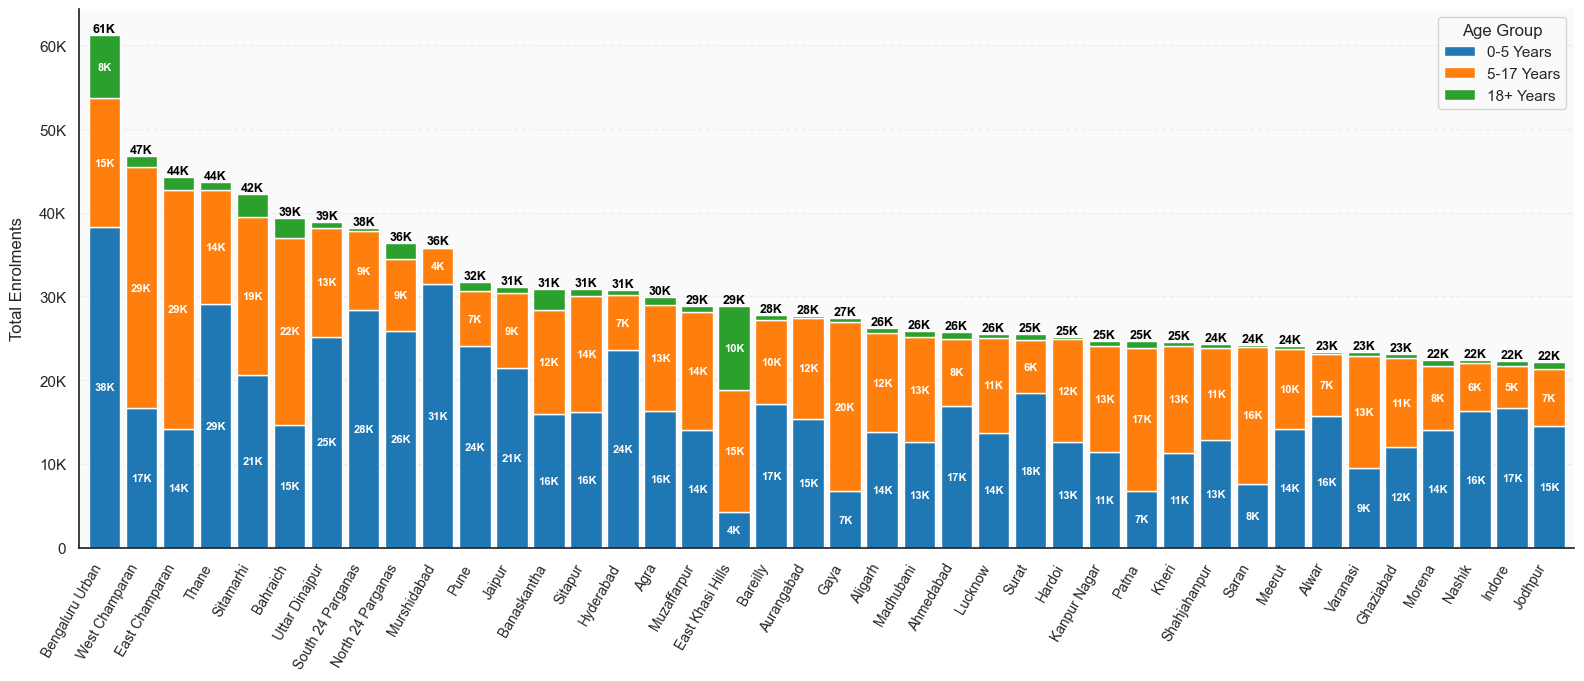

In [166]:
# --- 1. Data Preparation ---
age_cols = ['age_0_5', 'age_5_17', 'age_18_greater']

# Check correct column name for District
if 'District' in enrollment.columns:
    group_col = 'District'
else:
    group_col = 'district'

# Group and Sum
districts_group = enrollment.groupby(group_col)[age_cols].sum()

# Calculate 'Total' for sorting
districts_group['Total'] = districts_group.sum(axis=1)

# Sort descending and Keep Top 40
districts_group = districts_group.sort_values('Total', ascending=False).head(40)

# --- CRITICAL: Save Totals for Thresholds & Top Labels ---
max_total = districts_group['Total'].max()
totals = districts_group['Total'].values

# Drop 'Total' for plotting
plot_data = districts_group.drop(columns='Total')
plot_data.columns = ['0-5 Years', '5-17 Years', '18+ Years']

# --- 2. Helper Formatter ---
def human_format(num, pos=None):
    if num >= 1e6: return f'{num/1e6:.1f}M'
    if num >= 1e3: return f'{num/1e3:.0f}K'
    return f'{num:.0f}'

# --- 3. Plotting ---
fig, ax = plt.subplots(figsize=(16, 8))

# Create Stacked Bar Chart
plot_data.plot(kind='bar', stacked=True, width=0.85, 
               color=['#1f77b4', '#ff7f0e', '#2ca02c'], ax=ax)

# --- 4. Titles (Aligned) ---
#fig.text(x=0.05, y=0.96, s='District-wise Enrollment Breakdown (Top 40)', 
#         fontsize=20, fontweight='bold', ha='left', va='top', fontfamily='sans-serif')
#fig.text(x=0.05, y=0.91, s='Detailed demographics with cumulative totals', 
#         fontsize=13, color='#555555', ha='left', va='top', fontfamily='sans-serif')

# --- 5. LABEL LOGIC ---

# A. Internal Labels (Segments)
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        width = bar.get_width()
        x = bar.get_x()
        y = bar.get_y()
        
        # Threshold: Only label if segment is > 5% of the tallest bar
        if height > (max_total * 0.05): 
            label_text = human_format(height)
            ax.text(x + width/2, y + height/2, label_text, 
                    ha='center', va='center', color='white', 
                    fontsize=8, fontweight='bold')

# B. Top Labels (Totals)
for i, total_val in enumerate(totals):
    label_text = human_format(total_val)
    # Place text slightly above the bar
    ax.text(i, total_val, label_text, 
            ha='center', va='bottom', fontsize=9, fontweight='bold', color='black')

# --- 6. Styling ---
plt.ylabel('Total Enrolments', fontsize=12, labelpad=10)
plt.xlabel('', fontsize=12)
plt.xticks(rotation=60, ha='right', fontsize=10)

# Apply Formatter to Y-Axis
ax.yaxis.set_major_formatter(ticker.FuncFormatter(human_format))

# Legend
plt.legend(title='Age Group', frameon=True, loc='upper right')

# Grid & Spines
plt.grid(axis='y', linestyle='--', alpha=0.3)
sns.despine()

plt.tight_layout()
plt.subplots_adjust(top=0.85)

plt.savefig('Enrolment Images/District&Age_wise_enrolment_labled.png', dpi=300, bbox_inches='tight')
plt.show()

Pareto Insight: The top 329 districts account for 80% of the total enrollment.


C:\Users\priya\AppData\Local\Temp\ipykernel_35448\2917246696.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(district_subset.index, rotation=90, fontsize=10)


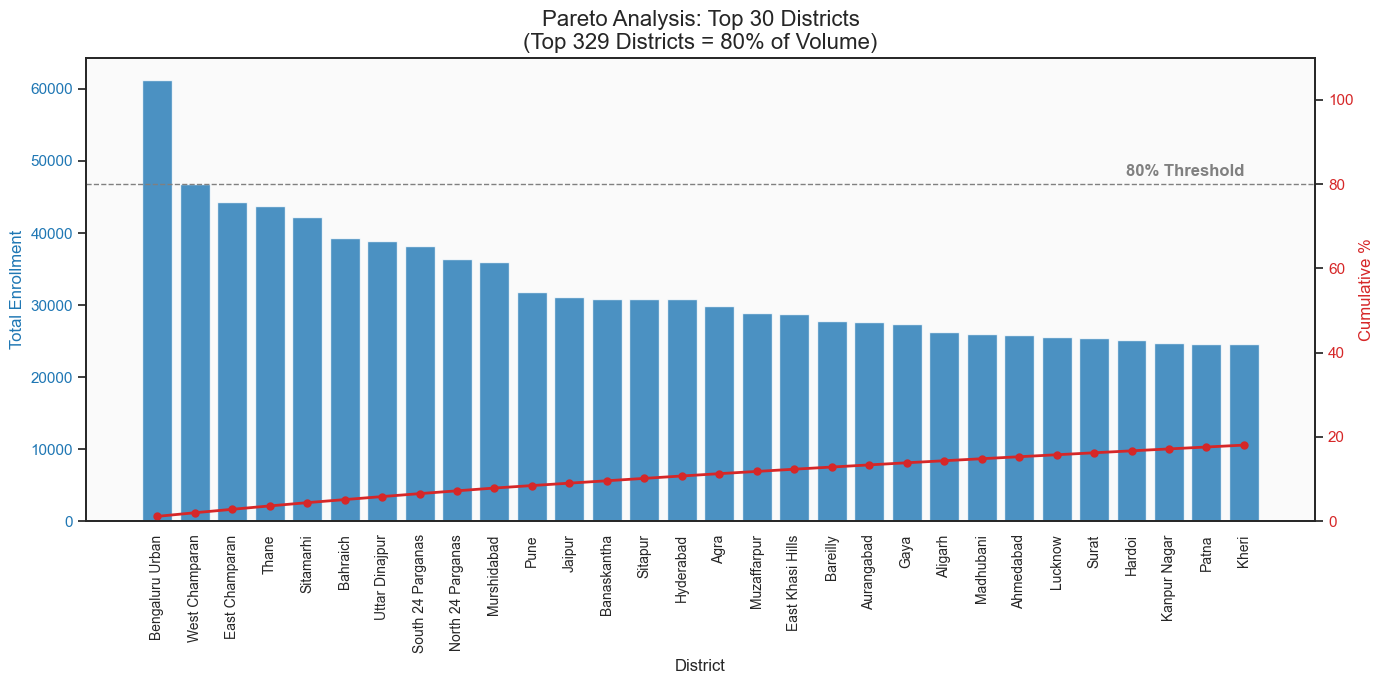

In [167]:
# --- 1. Data Preparation ---
# Group by District and sum total enrollments
district_counts = enrollment.groupby('district')['Total_Enrolment'].sum().sort_values(ascending=False)
total_volume = district_counts.sum()

# Calculate Cumulative Percentage
cumulative_percent = district_counts.cumsum() / total_volume * 100

# Identify the "80% Cutoff" (How many districts make up 80% of volume?)
cutoff_index = cumulative_percent[cumulative_percent <= 80].count()
print(f"Pareto Insight: The top {cutoff_index} districts account for 80% of the total enrollment.")

# --- 2. Plotting (Dual Axis) ---
fig, ax1 = plt.subplots(figsize=(14, 7))

# Define how many districts to show (e.g., Top 30 for readability)
top_n = 30
district_subset = district_counts.head(top_n)
cum_subset = cumulative_percent.head(top_n)

# Bar Chart (Volume) on Left Y-Axis
ax1.bar(district_subset.index, district_subset.values, color='#1f77b4', alpha=0.8, label='Enrollment Volume')
ax1.set_ylabel('Total Enrollment', color='#1f77b4', fontsize=12)
ax1.tick_params(axis='y', labelcolor='#1f77b4')
ax1.set_xticklabels(district_subset.index, rotation=90, fontsize=10)
ax1.set_xlabel('District', fontsize=12)

# Line Chart (Cumulative %) on Right Y-Axis
ax2 = ax1.twinx()
ax2.plot(district_subset.index, cum_subset.values, color='#d62728', marker='o', ms=5, linewidth=2, label='Cumulative %')
ax2.set_ylabel('Cumulative %', color='#d62728', fontsize=12)
ax2.tick_params(axis='y', labelcolor='#d62728')
ax2.set_ylim(0, 110)

# Add Reference Line at 80%
ax2.axhline(80, color='grey', linestyle='--', linewidth=1)
ax2.text(top_n-1, 82, '80% Threshold', color='grey', ha='right', fontweight='bold')

# Styling
plt.title(f'Pareto Analysis: Top {top_n} Districts\n(Top {cutoff_index} Districts = 80% of Volume)', fontsize=16)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

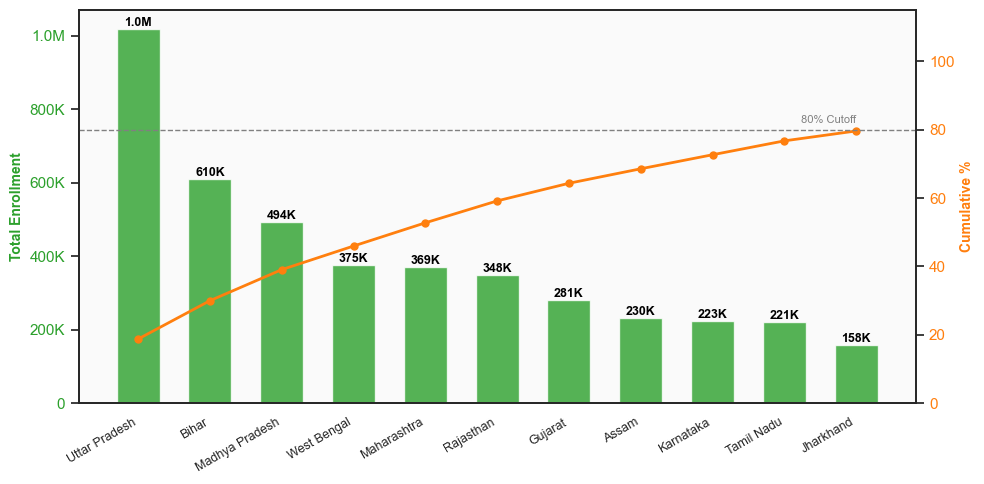

In [168]:
# --- 1. Data Preparation ---
enrollment['date'] = pd.to_datetime(enrollment['date'])
if 'state' in enrollment.columns:
    enrollment['state'] = enrollment['state'].astype(str).str.strip()

# FILTER: Entire History (March 2025 - Jan 2026)
start_date = '2025-03-01'
end_date = '2026-01-31'
mask = (enrollment['date'] >= start_date) & (enrollment['date'] <= end_date)
filtered_df = enrollment.loc[mask].copy()

# --- 2. Pareto Calculation ---
state_stats = filtered_df.groupby('state')['Total_Enrolment'].sum().sort_values(ascending=False)
total_volume = state_stats.sum()
cum_percent = state_stats.cumsum() / total_volume * 100

# Identify 80% Cutoff
cutoff_count = cum_percent[cum_percent <= 80].count()
if cutoff_count == 0: cutoff_count = 1

# Limit to Top 10 for Rigid View
top_n = 11
plot_vol = state_stats.head(top_n)
plot_cum = cum_percent.head(top_n)

# --- 3. Plotting ---
fig, ax1 = plt.subplots(figsize=(10, 5))

# A. Bar Chart (Volume)
bars = ax1.bar(plot_vol.index, plot_vol.values, color='#2ca02c', alpha=0.8, width=0.6)
ax1.set_ylabel('Total Enrollment', color='#2ca02c', fontsize=10, fontweight='bold')
ax1.set_xlabel('', fontsize=10, fontweight='bold')
ax1.tick_params(axis='y', labelcolor='#2ca02c')

# Set Ticks explicitly
ax1.set_xticks(range(len(plot_vol.index)))
ax1.set_xticklabels(plot_vol.index, rotation=30, ha='right', fontsize=9)

# Format Y-axis (M/K) helper function
def human_format(num, pos=None):
    if num >= 1e6: return f'{num/1e6:.1f}M'
    if num >= 1e3: return f'{num/1e3:.0f}K'
    return f'{num:.0f}'
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(human_format))

# --- ADD LABELS (M/K) ---
for bar in bars:
    height = bar.get_height()
    label = human_format(height)
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             label,
             ha='center', va='bottom', fontsize=9, color='black', fontweight='bold')

# B. Line Chart (Cumulative %)
ax2 = ax1.twinx()
ax2.plot(range(len(plot_cum)), plot_cum.values, color='#ff7f0e', marker='o', ms=5, linewidth=2)
ax2.set_ylabel('Cumulative %', color='#ff7f0e', fontsize=10, fontweight='bold')
ax2.tick_params(axis='y', labelcolor='#ff7f0e')
ax2.set_ylim(0, 115) 

# C. 80% Reference Line
ax2.axhline(80, color='grey', linestyle='--', linewidth=1)
ax2.text(len(plot_vol)-1, 82, '80% Cutoff', color='grey', ha='right', fontsize=8)

plt.grid(axis='x', alpha=0.1)
plt.tight_layout() 

# Save
plt.savefig('Enrolment Images/pareto_analysis.png', dpi=300, bbox_inches='tight')

plt.show()